## Exercise 3

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

(a) Generating coordinates of 100 virtual raindrops

In [6]:
n=100
x = np.random.rand(n)
y = np.random.rand(n)

(b) Plotting the raindrops and quarter circle for visualisation

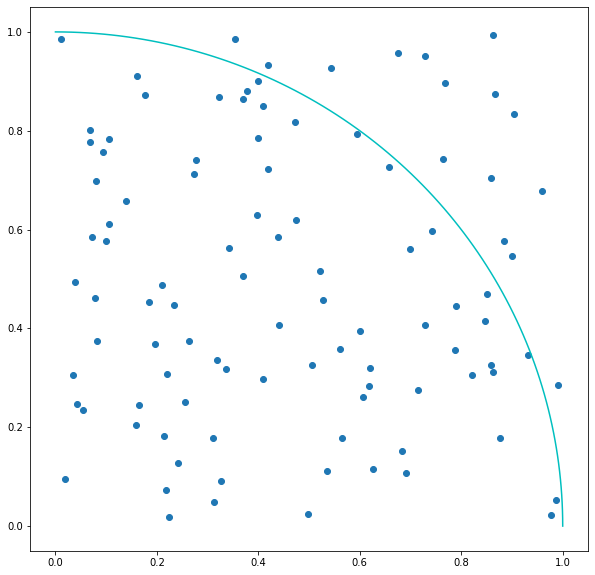

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(x,y)

#Circle equation calculations
theta = np.linspace(0,np.pi/2,100)
radius = 1
a=radius*np.cos(theta)
b=radius*np.sin(theta)
plt.plot(a,b, color='c');

(c) Determining a logical test and counting the raindrops within the circle

Since the radius of the circle is 1, we can use Pythagoras' Theorem to calculate the distance of each raindrop's location to the origin. If the raindrop is greater than 1 unit away, it is outside the quarter circle 

In [8]:
dist = np.sqrt(x**2+y**2)
in_circle =(dist <= 1).sum()
print(in_circle)

85


Since Area = $\frac{\pi r^{2}}{4}$ and we can approximate the the area of the circle by assuming that the number of raindrops that fell within the circle divided by the total number of raindrops indicates the fraction of the square (of area 1) that the quarter circle occupies.
So $\pi\approx \text{Area}*\frac{4}{r^{2}}$

In [9]:
area_approx = in_circle/n
pi = area_approx*4/radius**2
print(pi)

3.4


(e) Creating a function to run the above cells' functions for a given N

3.14414


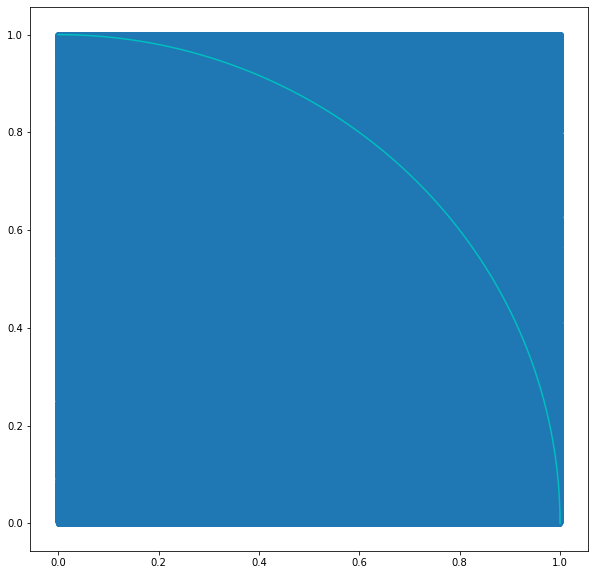

In [34]:
def PiApprox(N):
    x = np.random.rand(N)
    y = np.random.rand(N)
    
    plt.figure(figsize=(10,10))
    plt.scatter(x,y)

    #Circle equation calculations
    theta = np.linspace(0,np.pi/2,100)
    radius = 1
    a=radius*np.cos(theta)
    b=radius*np.sin(theta)
    plt.plot(a,b, color='c');
    
    dist = np.sqrt(x**2+y**2)
    in_circle =(dist <= 1).sum()
    #print(in_circle)

    area_approx = in_circle/N
    pi = area_approx*4/radius**2
    return pi

print(PiApprox(1000000))

(f) Does increasing N help with the accuracy?



Empirically, we've observed that increasing N does help. It reduces the deviation from the ideal value by allowing more points to account for random variation.

(g) Since I wrote the previous section using vectorised operations already, the code below is using loops for the time comparison.

In [27]:
def PiApprox2(N):
    x = np.random.rand(N)
    y = np.random.rand(N)
    
    #plt.figure(figsize=(10,10))
    #plt.scatter(x,y)

    #Circle equation calculations
    theta = np.linspace(0,np.pi/2,100)
    radius = 1
    a=radius*np.cos(theta)
    b=radius*np.sin(theta)
    #plt.plot(a,b, color='c');
    
    in_circle = 0
    dist = np.sqrt(x**2+y**2)
    for i in range(len(dist)):
        if dist[i]<=1:
            in_circle +=1
    #print(in_circle)

    area_approx = in_circle/N
    pi = area_approx*4/radius**2
    return pi

In [29]:
%timeit PiApprox2(1000)

875 µs ± 118 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [31]:
%timeit PiApprox(1000)

120 µs ± 14.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


The function using vectorised operations runs ~8 times faster, when compared with the function using the loops.